In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df = pd.read_csv('brain_stroke.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [5]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [8]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes


In [9]:
x = pd.get_dummies(x,drop_first=True)

In [10]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4976    0
4977    0
4978    0
4979    0
4980    0
Name: stroke, Length: 4981, dtype: int64

In [11]:
sc = StandardScaler()

In [89]:
x

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,0,1,1,0,0
1,80.0,0,1,105.92,32.5,1,1,1,0,0,0,0,1,0
2,49.0,0,0,171.23,34.4,0,1,1,0,0,1,0,0,1
3,79.0,1,0,174.12,24.0,0,1,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,1,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,1,0,1,0,0,0,1,0,0
4977,40.0,0,0,191.15,31.1,1,1,1,0,0,1,0,0,1
4978,45.0,1,0,95.02,31.8,0,1,0,0,0,0,0,0,1
4979,40.0,0,0,83.94,30.0,1,1,1,0,0,0,0,0,1


In [12]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [13]:
sc.fit(x_train)

StandardScaler()

In [14]:
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

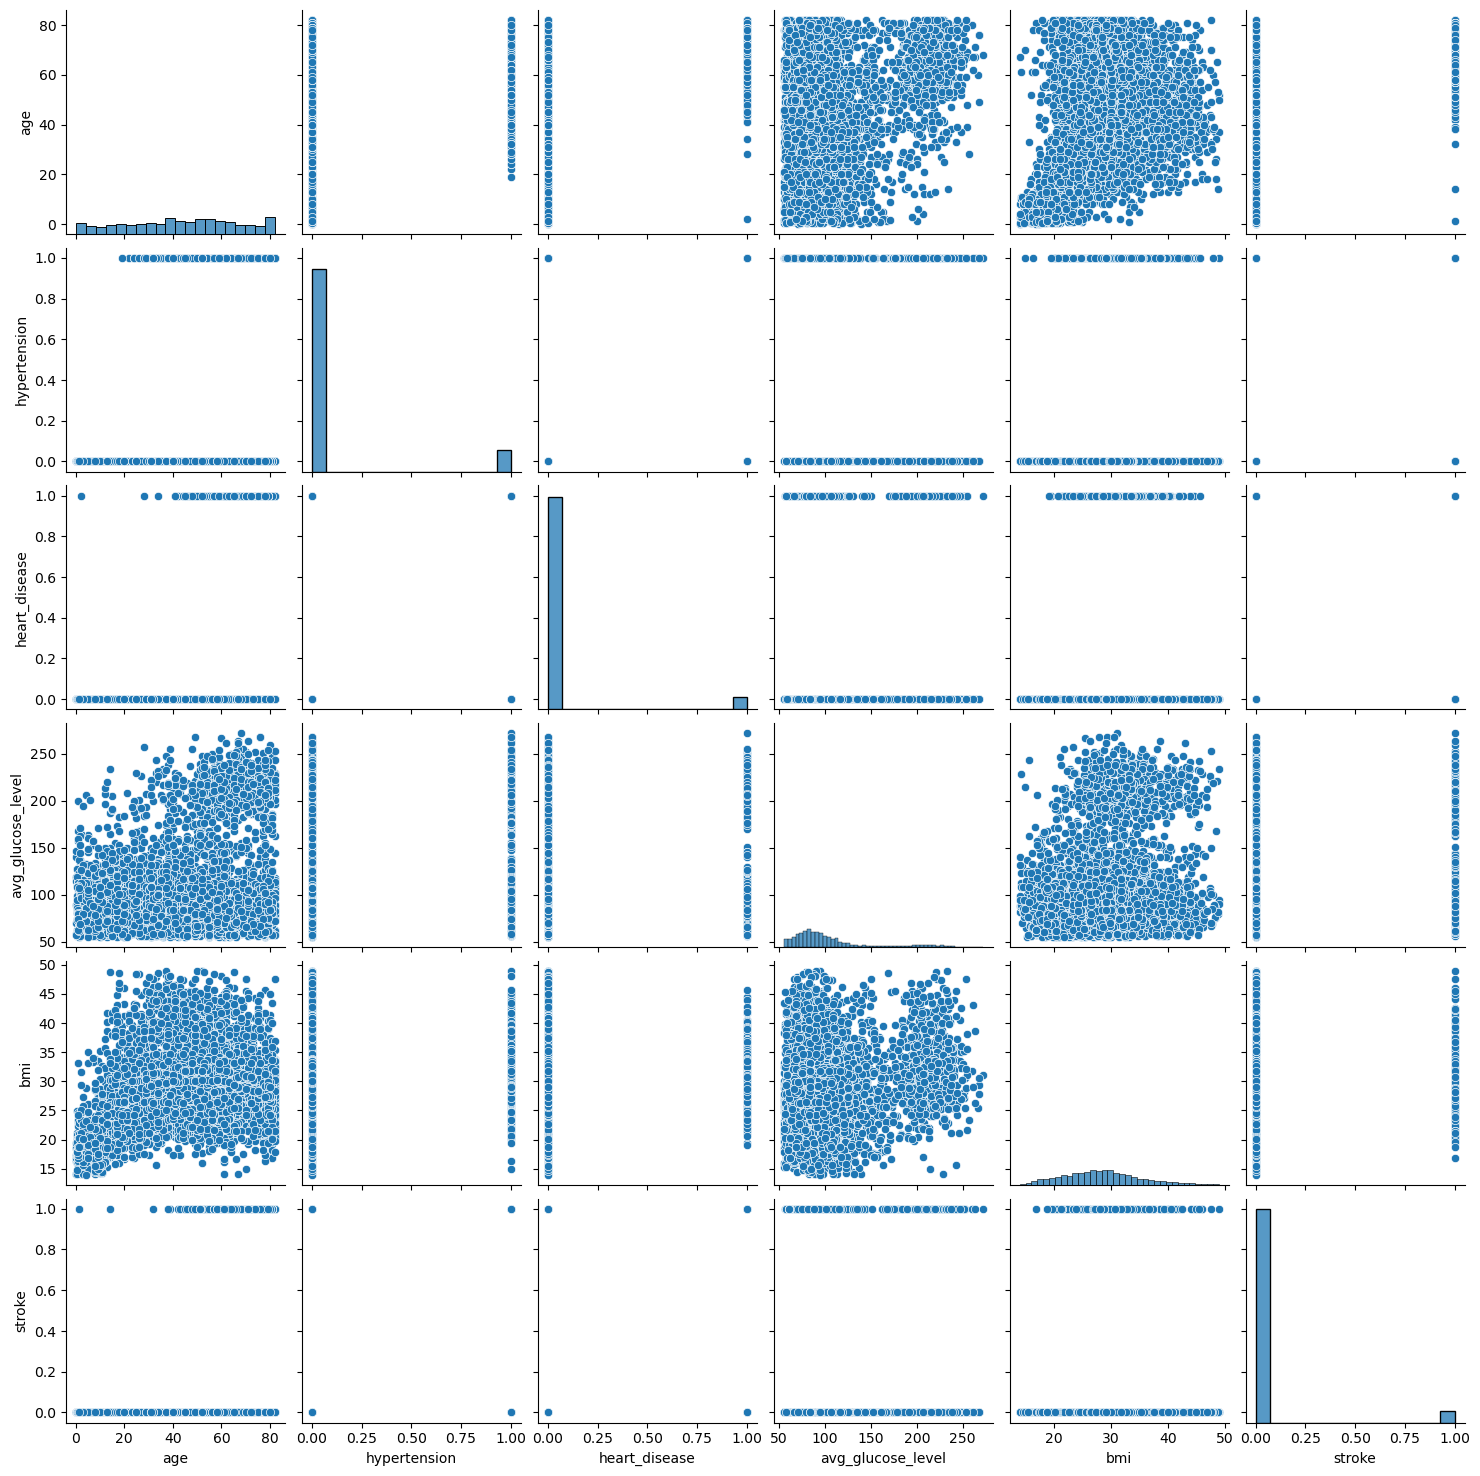

In [15]:
sns.pairplot(df)

In [16]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [17]:
corr = df.corr()

C:\Users\darshil\AppData\Local\Temp\ipykernel_16124\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


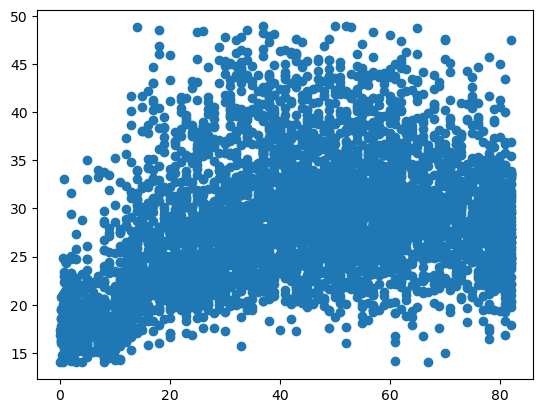

In [18]:
plt.scatter(df['age'],df['bmi'])

<Axes: xlabel='heart_disease', ylabel='count'>

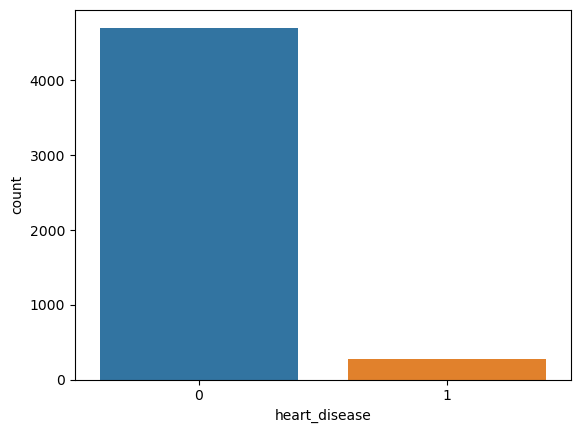

In [19]:
sns.countplot(x = df['heart_disease'],data = df)

<Axes: xlabel='age'>

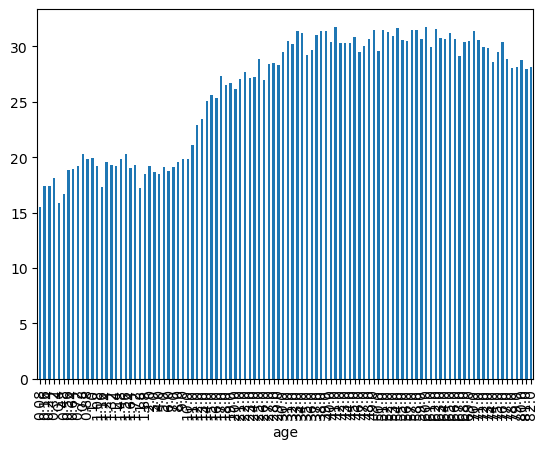

In [20]:
df.groupby(['age'])['bmi'].mean().plot.bar()

<Axes: xlabel='age'>

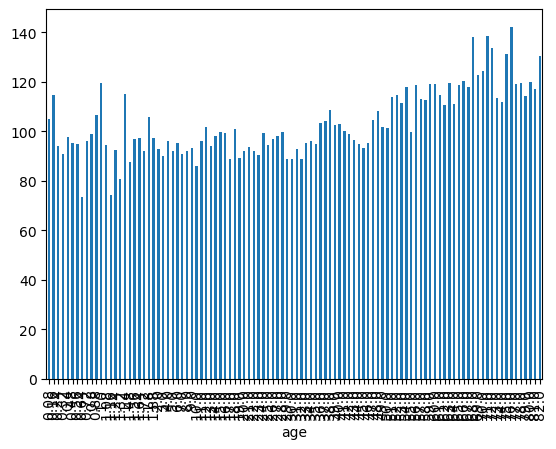

In [21]:
df.groupby(['age'])['avg_glucose_level'].mean().plot.bar()

<Axes: >

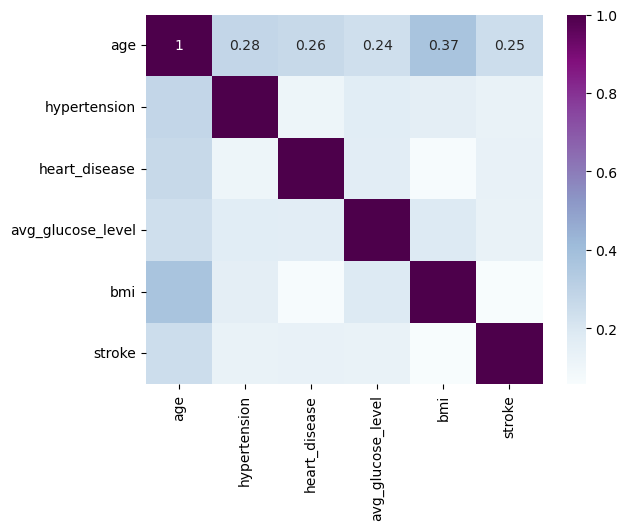

In [22]:
sns.heatmap(corr, cmap = 'BuPu', annot= True)

In [23]:
x_train.shape

(3984, 14)

In [24]:
lr = LogisticRegression()

In [25]:
lr.fit(x_train,y_train)

LogisticRegression()

In [26]:
y_pred_lr = lr.predict(x_test)

In [27]:
accuracy_score(y_test,y_pred_lr)

0.9558676028084253

In [28]:
confusion_matrix(y_test,y_pred_lr)

array([[953,   0],
       [ 44,   0]], dtype=int64)

In [29]:
rf = RandomForestClassifier()

In [30]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
y_pred_rf = rf.predict(x_test)

In [32]:
accuracy_score(y_test,y_pred_rf)

0.954864593781344

In [33]:
confusion_matrix(y_test,y_pred_rf)

array([[952,   1],
       [ 44,   0]], dtype=int64)

In [34]:
dt = DecisionTreeClassifier(max_depth=30)

In [35]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=30)

In [36]:
y_pred_dt = dt.predict(x_test)

In [37]:
accuracy_score(y_test,y_pred_dt)

0.921765295887663

In [38]:
confusion_matrix(y_test,y_pred_dt)

array([[902,  51],
       [ 27,  17]], dtype=int64)

In [39]:
dt_1 = DecisionTreeClassifier()

In [40]:
dt_1.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred_dt_1 = dt_1.predict(x_test)

In [42]:
accuracy_score(y_test,y_pred_dt_1)

0.9087261785356068

In [43]:
confusion_matrix(y_test,y_pred_dt_1)

array([[892,  61],
       [ 30,  14]], dtype=int64)

In [44]:
from sklearn.tree import plot_tree

[Text(0.4495837147691966, 0.975, 'x[0] <= 1.069\ngini = 0.097\nsamples = 3984\nvalue = [3780, 204]'),
 Text(0.18542464214380824, 0.925, 'x[0] <= 0.186\ngini = 0.049\nsamples = 3323\nvalue = [3240, 83]'),
 Text(0.05659121171770972, 0.875, 'x[0] <= -0.256\ngini = 0.013\nsamples = 2136\nvalue = [2122, 14]'),
 Text(0.01775410563692854, 0.825, 'x[3] <= -1.065\ngini = 0.004\nsamples = 1575\nvalue = [1572, 3]'),
 Text(0.007101642254771416, 0.775, 'x[3] <= -1.065\ngini = 0.05\nsamples = 39\nvalue = [38, 1]'),
 Text(0.003550821127385708, 0.725, 'gini = 0.0\nsamples = 38\nvalue = [38, 0]'),
 Text(0.010652463382157125, 0.725, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.028406569019085663, 0.775, 'x[0] <= -1.852\ngini = 0.003\nsamples = 1536\nvalue = [1534, 2]'),
 Text(0.01775410563692854, 0.725, 'x[0] <= -1.856\ngini = 0.036\nsamples = 55\nvalue = [54, 1]'),
 Text(0.014203284509542832, 0.675, 'gini = 0.0\nsamples = 49\nvalue = [49, 0]'),
 Text(0.02130492676431425, 0.675, 'x[10] <= -0.016\

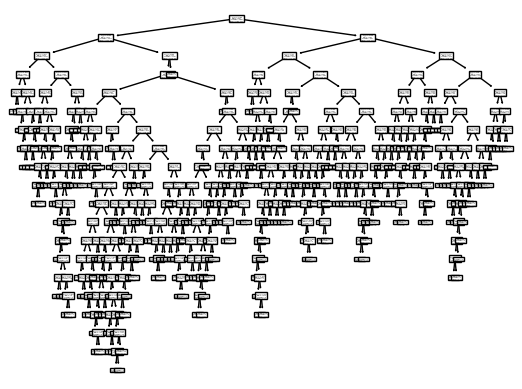

In [45]:
plot_tree(dt.fit(x_train,y_train))

In [46]:
sv = SVC()

In [47]:
sv.fit(x_train,y_train)

SVC()

In [48]:
y_pred_sv = sv.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred_sv)

0.9558676028084253

In [50]:
confusion_matrix(y_test,y_pred_sv)

array([[953,   0],
       [ 44,   0]], dtype=int64)

In [51]:
!pip install joblib

In [52]:
import joblib

In [53]:
dummy_columns = x.columns.tolist()

In [54]:
from xgboost import XGBClassifier

In [55]:
xb = XGBClassifier()

In [56]:
xb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
y_pred_xg = xb.predict(x_test)

In [58]:
accuracy_score(y_test,y_pred_xg)

0.9498495486459378

In [59]:
confusion_matrix(y_test,y_pred_xg)

array([[946,   7],
       [ 43,   1]], dtype=int64)

In [60]:
from sklearn.ensemble import BaggingClassifier , StackingClassifier 

In [61]:
bc = BaggingClassifier(base_estimator=LogisticRegression(),
                      n_estimators=500,
    max_samples=0.30,
    bootstrap=True,
    random_state=23)

In [62]:
bc.fit(x_train,y_train)

C:\Users\darshil\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=LogisticRegression(), max_samples=0.3,
                  n_estimators=500, random_state=23)

In [63]:
y_pred_bc = bc.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred_bc)

0.9558676028084253

In [65]:
confusion_matrix(y_test,y_pred_bc)

array([[953,   0],
       [ 44,   0]], dtype=int64)

In [66]:
estimators = [
    ('rf',RandomForestClassifier()),
    ('xb',XGBClassifier()),
    ('bc',BaggingClassifier()),
    ('lr',LogisticRegression())
]

In [67]:
clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv = 10
)

In [68]:
clf.fit(x_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('rf', RandomForestClassifier()),
                               ('xb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              i...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('bc', BaggingClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [69]:
y_pred_clf = clf.predict(x_test)

In [70]:
accuracy_score(y_test,y_pred_clf)

0.954864593781344

In [71]:
confusion_matrix(y_test,y_pred_clf)

array([[952,   1],
       [ 44,   0]], dtype=int64)

In [72]:
import pickle 
with open('custom_model.pkl', 'wb') as file:
    pickle.dump(xb, file)

<Axes: >

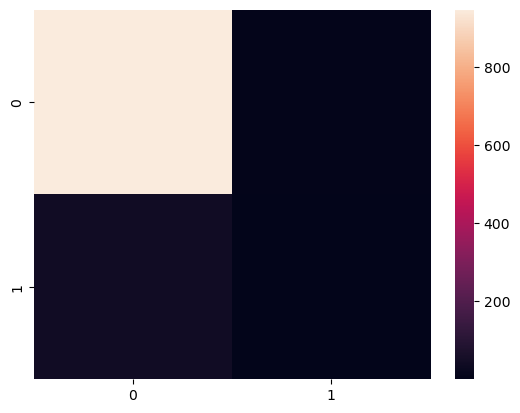

In [74]:
sns.heatmap(confusion_matrix(y_test,y_pred_xg))

In [75]:
confusion_matrix(y_test,y_pred_xg)

array([[946,   7],
       [ 43,   1]], dtype=int64)

In [83]:
print(xb.predict(x_test))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [79]:
from sklearn.model_selection import cross_val_score

In [81]:
cross_val_score(xb,x,y,cv=10)

array([0.93987976, 0.94176707, 0.94578313, 0.94779116, 0.92570281,
       0.94779116, 0.93975904, 0.94578313, 0.93574297, 0.93373494])

In [85]:
data = {
    'gender': ['Male', 'Female', 'Female', 'Male'],
    'ever_married': ['No', 'Yes', 'Yes', 'No'],
    'work_type': ['Private', 'Self-employed', 'Govt_job', 'Private'],
    'Residence_type': ['Urban', 'Rural', 'Urban', 'Rural'],
    'smoking_status': ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
}

df = pd.DataFrame(data)

# Dictionary to hold the encoders
encoders = {}

# Encode categorical variables
for column in df.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder

# Save the encoders to a file
encoder_path = "label_encoder.pkl"
with open(encoder_path, 'wb') as encoder_file:
    pickle.dump(encoders, encoder_file)

In [87]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import pickle

# Sample DataFrame
data = {
    'gender': ['Male', 'Female', 'Female', 'Male'],
    'ever_married': ['No', 'Yes', 'Yes', 'No'],
    'work_type': ['Private', 'Self-employed', 'Govt_job', 'Private'],
    'Residence_type': ['Urban', 'Rural', 'Urban', 'Rural'],
    'smoking_status': ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
}

df = pd.DataFrame(data)

# Dictionary to hold the encoders
encoders = {}

# Initialize OneHotEncoder with handle_unknown='ignore'
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit encoder on the categorical columns and transform
for column in df.select_dtypes(include=['object']).columns:
    # Fit encoder and transform the data
    encoded = encoder.fit_transform(df[[column]]).toarray()
    df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([column]))
    df = df.join(df_encoded).drop(column, axis=1)
    encoders[column] = encoder

# Save the encoders to a file
encoder_path = "onehot_encoder.pkl"
with open(encoder_path, 'wb') as encoder_file:
    pickle.dump(encoders, encoder_file)

print("Encoders saved successfully.")

Encoders saved successfully.


In [90]:
import streamlit as st
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder

# Load the model and encoders
model_path = r"C:\Users\darshil\AI shaksham\Project_AI\project\model_files\custom_model.pkl"
encoder_path = r"C:\Users\darshil\AI shaksham\Project_AI\project\model_files\label_encoder.pkl"

with open(model_path, 'rb') as model_file:
    model = pickle.load(model_file)

with open(encoder_path, 'rb') as encoder_file:
    encoders = pickle.load(encoder_file)
    
    
type(model)

xgboost.sklearn.XGBClassifier